<a href="https://colab.research.google.com/github/Poorya0071/heart-disease-classification/blob/main/Orange%20Vs%20Grapefruit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Oranges vs. Grapefruit
This notebook aims to classify Oranges vs. Grapefruit by Random Forest Classifier and Deep Neural Network and compare the results.

In [166]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Upload the data

In [167]:
data = pd.read_csv('/content/citrus.csv')
data.head()

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9


In [168]:
data.describe()

,diameter,weight,red,green,blue
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9.975685,175.050792,153.847800,76.010600,11.363200
std,1.947844,29.212119,10.432954,11.708433,9.061275
min,2.960000,86.760000,115.000000,31.000000,2.000000
25%,8.460000,152.220000,147.000000,68.000000,2.000000
50%,9.980000,174.985000,154.000000,76.000000,10.000000
75%,11.480000,197.722500,161.000000,84.000000,17.000000
max,16.450000,261.510000,192.000000,116.000000,56.000000


# The dataset is balance.

In [169]:
data.name.value_counts()

orange        5000
grapefruit    5000
Name: name, dtype: int64

# let's shuffle the dataset.

In [170]:
df_shuffled = data.sample(frac=1, random_state=42) # shuffle with random_state=42 for reproducibility

In [171]:
df_shuffled = df_shuffled.reset_index()

In [172]:
df_shuffled.drop(['index'],axis = 1,  inplace = True)

In [173]:
df_shuffled

,name,diameter,weight,red,green,blue
0,grapefruit,10.66,184.37,166,60,18
1,orange,10.40,181.34,166,109,13
2,orange,7.99,145.45,150,72,2
3,orange,10.55,182.99,151,84,2
4,orange,10.10,177.31,160,72,2
...,...,...,...,...,...,...
9995,grapefruit,10.18,176.92,145,77,15
9996,grapefruit,9.32,162.56,159,69,28
9997,grapefruit,9.72,169.85,150,67,10
9998,orange,7.29,135.10,154,72,8


# Define X and y

In [174]:
X = df_shuffled.drop('name', axis = 1)
y = df_shuffled['name']

In [109]:
X

,diameter,weight,red,green,blue
0,0.1066,0.18437,0.650980,0.235294,0.070588
1,0.1040,0.18134,0.650980,0.427451,0.050980
2,0.0799,0.14545,0.588235,0.282353,0.007843
3,0.1055,0.18299,0.592157,0.329412,0.007843
4,0.1010,0.17731,0.627451,0.282353,0.007843
...,...,...,...,...,...
9995,0.1018,0.17692,0.568627,0.301961,0.058824
9996,0.0932,0.16256,0.623529,0.270588,0.109804
9997,0.0972,0.16985,0.588235,0.262745,0.039216
9998,0.0729,0.13510,0.603922,0.282353,0.031373


# Split the dataset

In [175]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Scale the X data

In [176]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train) # just fit to training set to avoid overfitting and data leakage.
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# let's encode the labels.

In [178]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False)
train_labels_one_hot = one_hot_encoder.fit_transform(y_train.to_numpy().reshape(-1, 1))
val_labels_one_hot = one_hot_encoder.transform(y_test.to_numpy().reshape(-1, 1))

# Check what training labels look like
train_labels_one_hot

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]])

In [179]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(y_train.to_numpy())
val_labels_encoded = label_encoder.transform(y_test.to_numpy())
# Check what training labels look like
train_labels_encoded

array([1, 1, 0, ..., 0, 0, 1])

# Base Model RandomForrest

In [191]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train_scaled, train_labels_encoded)

RandomForestClassifier()

In [192]:
clf.score(X_test_scaled, val_labels_encoded)

0.957

## Accuracy 95.7%

# Plot Confusion Matrix

In [182]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay

In [183]:
y_pred = clf.predict(X_test)

In [184]:
cm = confusion_matrix(val_labels_encoded, y_pred, labels=clf.classes_)

In [185]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)

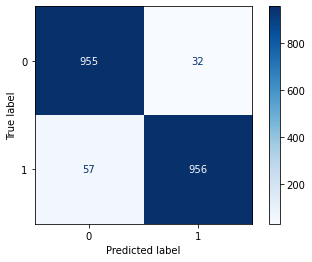

In [186]:
disp.plot(cmap='Blues')

**The confusion Matrix looks very good, as positive and negative false is around 3 to 5 %.**

# Deep Learning and DNN

### Let's define the checkpoint callback function 

In [218]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename 
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), # create filepath to save model
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True)

# Model_1 simple DNN with 50 epochs

In [219]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
], name="model_1_dense")

# Compile the model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(), 
                metrics=["accuracy"])

history = model_1.fit(X_train_scaled, train_labels_encoded, epochs=50,
                      validation_data = (X_test_scaled, val_labels_encoded),
                      callbacks= [create_model_checkpoint(model_name=model_1.name)])

Epoch 1/50
250/250 [==============================] - 2s 5ms/step - loss: 0.6147 - accuracy: 0.6511 - val_loss: 0.4732 - val_accuracy: 0.8650
Epoch 2/50
250/250 [==============================] - 1s 5ms/step - loss: 0.3920 - accuracy: 0.9003 - val_loss: 0.3026 - val_accuracy: 0.9270
Epoch 3/50
250/250 [==============================] - 1s 5ms/step - loss: 0.2519 - accuracy: 0.9216 - val_loss: 0.1890 - val_accuracy: 0.9300
Epoch 4/50
250/250 [==============================] - 1s 5ms/step - loss: 0.1960 - accuracy: 0.9258 - val_loss: 0.1694 - val_accuracy: 0.9295
Epoch 5/50
250/250 [==============================] - 1s 5ms/step - loss: 0.1889 - accuracy: 0.9261 - val_loss: 0.1653 - val_accuracy: 0.9315
Epoch 6/50
250/250 [==============================] - 1s 5ms/step - loss: 0.1858 - accuracy: 0.9261 - val_loss: 0.1639 - val_accuracy: 0.9330
Epoch 7/50
250/250 [==============================] - 1s 5ms/step - loss: 0.1845 - accuracy: 0.9264 - val_loss: 0.1627 - val_accuracy: 0.9330
Epoch 

In [220]:
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense")
model_1.evaluate(X_test_scaled, val_labels_encoded)

63/63 [==============================] - 0s 2ms/step - loss: 0.1250 - accuracy: 0.9500


[0.12496744841337204, 0.949999988079071]

# Model_2 simple DNN with 150 epochs

In [221]:
tf.random.set_seed(42)

# Create the model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
], name="model_2_dense")

# Compile the model with the ideal learning rate
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(), 
                metrics=["accuracy"])

history_2 = model_2.fit(X_train_scaled, train_labels_encoded, epochs=150, verbose=0,
                      validation_data = (X_test_scaled, val_labels_encoded),
                      callbacks= [create_model_checkpoint(model_name=model_2.name)])

In [222]:
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense")
model_2.evaluate(X_test_scaled, val_labels_encoded)

63/63 [==============================] - 0s 2ms/step - loss: 0.0472 - accuracy: 0.9785


[0.04719266667962074, 0.9785000085830688]

## ***Model_2 beats the baseline of random forest***

# model_3 more complicated DNN

In [224]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(8, activation="relu"),
  tf.keras.layers.Dense(16, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
], name="model_3_dense")

# Compile the model 
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(), 
                metrics=["accuracy"])

history_3 = model_3.fit(X_train_scaled, train_labels_encoded, epochs=50, verbose =0,
                      validation_data = (X_test, val_labels_encoded),
                      callbacks=[create_model_checkpoint(model_name=model_3.name)])

In [225]:
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense")
model_3.evaluate(X_test_scaled, val_labels_encoded)

63/63 [==============================] - 0s 2ms/step - loss: 0.1588 - accuracy: 0.9340


[0.15876613557338715, 0.9340000152587891]

## Model_3_1 like model_3 with 150 epochs

In [201]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_3_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(8, activation="relu"),
  tf.keras.layers.Dense(16, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
], name="model_3_1_dense")

# Compile the model 
model_3_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(), 
                metrics=["accuracy"])

history_3_1 = model_3_1.fit(X_train_scaled, train_labels_encoded, epochs=150, verbose =0,
                      validation_data = (X_test, val_labels_encoded),
                      callbacks=[create_model_checkpoint(model_name=model_3_1.name)])

In [202]:
model_3_1 = tf.keras.models.load_model("model_experiments/model_3_1_dense")
model_3_1.evaluate(X_test_scaled, val_labels_encoded)

63/63 [==============================] - 0s 2ms/step - loss: 0.1588 - accuracy: 0.9340


[0.15876613557338715, 0.9340000152587891]

## Model_4 and Model_4_1 other DNN with 50 and 150 epochs.

In [199]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(16, activation="relu"),
  tf.keras.layers.Dense(8, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
], name="model_4_dense")

# Compile the model 
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(), 
                metrics=["accuracy"])

history_4 = model_4.fit(X_train_scaled, train_labels_encoded, epochs=50, verbose =0,
                      validation_data = (X_test_scaled, val_labels_encoded),
                      callbacks=[create_model_checkpoint(model_name=model_4.name)])

In [200]:
model_4 = tf.keras.models.load_model("model_experiments/model_4_dense")
model_4.evaluate(X_test_scaled, val_labels_encoded)

63/63 [==============================] - 0s 5ms/step - loss: 0.0573 - accuracy: 0.9795


[0.057271260768175125, 0.9794999957084656]

In [205]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_4_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(16, activation="relu"),
  tf.keras.layers.Dense(8, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
], name="model_4_1_dense")

# Compile the model 
model_4_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(), 
                metrics=["accuracy"])

history_4_1 = model_4_1.fit(X_train_scaled, train_labels_encoded, epochs=150, verbose =0,
                      validation_data = (X_test_scaled, val_labels_encoded),
                      callbacks=[create_model_checkpoint(model_name=model_4_1.name)])

In [206]:
model_4_1 = tf.keras.models.load_model("model_experiments/model_4_1_dense")
model_4_1.evaluate(X_test_scaled, val_labels_encoded)

63/63 [==============================] - 0s 2ms/step - loss: 0.0525 - accuracy: 0.9790


[0.052518319338560104, 0.9789999723434448]

# Conclusion

A good chice of DNN can beat the base random forrest model. Among all model, model_4 had the best performance.